## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
"""Code Here
    建立你的神經網路
"""
def build_mlp():
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model


In [5]:
"""
Compile 模型
"""
model = build_mlp()
model.summary()

optimizer = keras.optimizers.SGD(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [6]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 9s 181us/step - loss: 2.2786 - accuracy: 0.1420 - val_loss: 2.2284 - val_accuracy: 0.1752
Epoch 2/500
50000/50000 [==============================] - 8s 158us/step - loss: 2.1972 - accuracy: 0.1973 - val_loss: 2.1673 - val_accuracy: 0.2217
Epoch 3/500
50000/50000 [==============================] - 8s 160us/step - loss: 2.1435 - accuracy: 0.2365 - val_loss: 2.1185 - val_accuracy: 0.2623
Epoch 4/500
50000/50000 [==============================] - 8s 158us/step - loss: 2.0986 - accuracy: 0.2640 - val_loss: 2.0782 - val_accuracy: 0.2785
Epoch 5/500
50000/50000 [==============================] - 8s 158us/step - loss: 2.0617 - accuracy: 0.2796 - val_loss: 2.0445 - val_accuracy: 0.2899
Epoch 6/500
50000/50000 [==============================] - 8s 160us/step - loss: 2.0304 - accuracy: 0.2926 - val_loss: 2.0153 - val_accuracy: 0.3020
Epoch 7/500
50000/50000 [==============================]

50000/50000 [==============================] - 8s 160us/step - loss: 1.6682 - accuracy: 0.4193 - val_loss: 1.6745 - val_accuracy: 0.4187
Epoch 56/500
50000/50000 [==============================] - 9s 172us/step - loss: 1.6652 - accuracy: 0.4205 - val_loss: 1.6689 - val_accuracy: 0.4189
Epoch 57/500
50000/50000 [==============================] - 9s 171us/step - loss: 1.6619 - accuracy: 0.4221 - val_loss: 1.6678 - val_accuracy: 0.4208
Epoch 58/500
50000/50000 [==============================] - 8s 166us/step - loss: 1.6589 - accuracy: 0.4235 - val_loss: 1.6641 - val_accuracy: 0.4202
Epoch 59/500
50000/50000 [==============================] - 9s 179us/step - loss: 1.6560 - accuracy: 0.4238 - val_loss: 1.6598 - val_accuracy: 0.4226
Epoch 60/500
50000/50000 [==============================] - 9s 184us/step - loss: 1.6530 - accuracy: 0.4253 - val_loss: 1.6580 - val_accuracy: 0.4216
Epoch 61/500
50000/50000 [==============================] - 9s 172us/step - loss: 1.6502 - accuracy: 0.4250 - val

50000/50000 [==============================] - 8s 157us/step - loss: 1.5382 - accuracy: 0.4631 - val_loss: 1.5590 - val_accuracy: 0.4509
Epoch 110/500
50000/50000 [==============================] - 8s 166us/step - loss: 1.5363 - accuracy: 0.4633 - val_loss: 1.5573 - val_accuracy: 0.4529
Epoch 111/500
50000/50000 [==============================] - 8s 169us/step - loss: 1.5348 - accuracy: 0.4651 - val_loss: 1.5557 - val_accuracy: 0.4535
Epoch 112/500
50000/50000 [==============================] - 10s 197us/step - loss: 1.5329 - accuracy: 0.4654 - val_loss: 1.5595 - val_accuracy: 0.4510
Epoch 113/500
50000/50000 [==============================] - 9s 177us/step - loss: 1.5313 - accuracy: 0.4655 - val_loss: 1.5552 - val_accuracy: 0.4582
Epoch 114/500
50000/50000 [==============================] - 8s 156us/step - loss: 1.5292 - accuracy: 0.4662 - val_loss: 1.5537 - val_accuracy: 0.4566
Epoch 115/500
50000/50000 [==============================] - 8s 157us/step - loss: 1.5269 - accuracy: 0.467

50000/50000 [==============================] - 8s 155us/step - loss: 1.4487 - accuracy: 0.4941 - val_loss: 1.4918 - val_accuracy: 0.4739
Epoch 164/500
50000/50000 [==============================] - 8s 155us/step - loss: 1.4470 - accuracy: 0.4958 - val_loss: 1.4947 - val_accuracy: 0.4745
Epoch 165/500
50000/50000 [==============================] - 8s 158us/step - loss: 1.4460 - accuracy: 0.4944 - val_loss: 1.4956 - val_accuracy: 0.4698
Epoch 166/500
50000/50000 [==============================] - 9s 173us/step - loss: 1.4445 - accuracy: 0.4951 - val_loss: 1.4925 - val_accuracy: 0.4760
Epoch 167/500
50000/50000 [==============================] - 8s 163us/step - loss: 1.4429 - accuracy: 0.4953 - val_loss: 1.4866 - val_accuracy: 0.4747
Epoch 168/500
50000/50000 [==============================] - 8s 169us/step - loss: 1.4414 - accuracy: 0.4968 - val_loss: 1.4901 - val_accuracy: 0.4723
Epoch 169/500
50000/50000 [==============================] - 8s 170us/step - loss: 1.4395 - accuracy: 0.4967

50000/50000 [==============================] - 9s 177us/step - loss: 1.3730 - accuracy: 0.5195 - val_loss: 1.4425 - val_accuracy: 0.4908
Epoch 218/500
50000/50000 [==============================] - 8s 164us/step - loss: 1.3714 - accuracy: 0.5210 - val_loss: 1.4410 - val_accuracy: 0.4907
Epoch 219/500
50000/50000 [==============================] - 9s 184us/step - loss: 1.3697 - accuracy: 0.5211 - val_loss: 1.4400 - val_accuracy: 0.4929
Epoch 220/500
50000/50000 [==============================] - 9s 183us/step - loss: 1.3691 - accuracy: 0.5210 - val_loss: 1.4449 - val_accuracy: 0.4911
Epoch 221/500
50000/50000 [==============================] - 9s 182us/step - loss: 1.3675 - accuracy: 0.5216 - val_loss: 1.4416 - val_accuracy: 0.4885
Epoch 222/500
50000/50000 [==============================] - 10s 201us/step - loss: 1.3660 - accuracy: 0.5224 - val_loss: 1.4510 - val_accuracy: 0.4845
Epoch 223/500
50000/50000 [==============================] - 9s 183us/step - loss: 1.3651 - accuracy: 0.523

50000/50000 [==============================] - 9s 174us/step - loss: 1.3041 - accuracy: 0.5430 - val_loss: 1.4128 - val_accuracy: 0.5055
Epoch 272/500
50000/50000 [==============================] - 8s 156us/step - loss: 1.3025 - accuracy: 0.5447 - val_loss: 1.4252 - val_accuracy: 0.4957
Epoch 273/500
50000/50000 [==============================] - 8s 164us/step - loss: 1.3017 - accuracy: 0.5445 - val_loss: 1.4085 - val_accuracy: 0.5048
Epoch 274/500
50000/50000 [==============================] - 8s 169us/step - loss: 1.2999 - accuracy: 0.5451 - val_loss: 1.4209 - val_accuracy: 0.4975
Epoch 275/500
50000/50000 [==============================] - 9s 175us/step - loss: 1.2996 - accuracy: 0.5453 - val_loss: 1.4036 - val_accuracy: 0.5043
Epoch 276/500
50000/50000 [==============================] - 9s 178us/step - loss: 1.2974 - accuracy: 0.5464 - val_loss: 1.4037 - val_accuracy: 0.5034
Epoch 277/500
50000/50000 [==============================] - 9s 180us/step - loss: 1.2964 - accuracy: 0.5467

50000/50000 [==============================] - 9s 171us/step - loss: 1.2414 - accuracy: 0.5653 - val_loss: 1.3806 - val_accuracy: 0.5094
Epoch 326/500
50000/50000 [==============================] - 9s 172us/step - loss: 1.2398 - accuracy: 0.5671 - val_loss: 1.3905 - val_accuracy: 0.5070
Epoch 327/500
50000/50000 [==============================] - 8s 169us/step - loss: 1.2391 - accuracy: 0.5658 - val_loss: 1.3781 - val_accuracy: 0.5117
Epoch 328/500
50000/50000 [==============================] - 8s 169us/step - loss: 1.2368 - accuracy: 0.5677 - val_loss: 1.3762 - val_accuracy: 0.5157
Epoch 329/500
50000/50000 [==============================] - 8s 169us/step - loss: 1.2360 - accuracy: 0.5668 - val_loss: 1.3759 - val_accuracy: 0.5130
Epoch 330/500
50000/50000 [==============================] - 8s 164us/step - loss: 1.2350 - accuracy: 0.5668 - val_loss: 1.3955 - val_accuracy: 0.5016
Epoch 331/500
50000/50000 [==============================] - 8s 163us/step - loss: 1.2342 - accuracy: 0.5691

50000/50000 [==============================] - 8s 167us/step - loss: 1.1816 - accuracy: 0.5854 - val_loss: 1.3598 - val_accuracy: 0.5175
Epoch 380/500
50000/50000 [==============================] - 9s 181us/step - loss: 1.1818 - accuracy: 0.5871 - val_loss: 1.3546 - val_accuracy: 0.5207
Epoch 381/500
50000/50000 [==============================] - 8s 158us/step - loss: 1.1796 - accuracy: 0.5867 - val_loss: 1.3643 - val_accuracy: 0.5195
Epoch 382/500
50000/50000 [==============================] - 9s 171us/step - loss: 1.1793 - accuracy: 0.5861 - val_loss: 1.3535 - val_accuracy: 0.5209
Epoch 383/500
50000/50000 [==============================] - 8s 169us/step - loss: 1.1775 - accuracy: 0.5889 - val_loss: 1.3601 - val_accuracy: 0.5195
Epoch 384/500
50000/50000 [==============================] - 9s 184us/step - loss: 1.1762 - accuracy: 0.5882 - val_loss: 1.3573 - val_accuracy: 0.5216
Epoch 385/500
50000/50000 [==============================] - 9s 173us/step - loss: 1.1745 - accuracy: 0.5900

50000/50000 [==============================] - 8s 163us/step - loss: 1.1255 - accuracy: 0.6075 - val_loss: 1.3507 - val_accuracy: 0.5268
Epoch 434/500
50000/50000 [==============================] - 8s 169us/step - loss: 1.1244 - accuracy: 0.6061 - val_loss: 1.3593 - val_accuracy: 0.5182
Epoch 435/500
50000/50000 [==============================] - 8s 170us/step - loss: 1.1232 - accuracy: 0.6077 - val_loss: 1.3723 - val_accuracy: 0.5137
Epoch 436/500
50000/50000 [==============================] - 9s 175us/step - loss: 1.1212 - accuracy: 0.6090 - val_loss: 1.3842 - val_accuracy: 0.5164
Epoch 437/500
50000/50000 [==============================] - 8s 168us/step - loss: 1.1207 - accuracy: 0.6090 - val_loss: 1.3658 - val_accuracy: 0.5186
Epoch 438/500
50000/50000 [==============================] - 9s 173us/step - loss: 1.1186 - accuracy: 0.6076 - val_loss: 1.3480 - val_accuracy: 0.5244
Epoch 439/500
50000/50000 [==============================] - 9s 174us/step - loss: 1.1167 - accuracy: 0.6086

50000/50000 [==============================] - 8s 161us/step - loss: 1.0703 - accuracy: 0.6290 - val_loss: 1.3357 - val_accuracy: 0.5292
Epoch 488/500
50000/50000 [==============================] - 8s 157us/step - loss: 1.0683 - accuracy: 0.6273 - val_loss: 1.3539 - val_accuracy: 0.5233
Epoch 489/500
50000/50000 [==============================] - 8s 154us/step - loss: 1.0678 - accuracy: 0.6274 - val_loss: 1.3412 - val_accuracy: 0.5296
Epoch 490/500
50000/50000 [==============================] - 8s 152us/step - loss: 1.0649 - accuracy: 0.6279 - val_loss: 1.4049 - val_accuracy: 0.5077
Epoch 491/500
50000/50000 [==============================] - 8s 157us/step - loss: 1.0665 - accuracy: 0.6289 - val_loss: 1.3530 - val_accuracy: 0.5248
Epoch 492/500
50000/50000 [==============================] - 9s 171us/step - loss: 1.0657 - accuracy: 0.6280 - val_loss: 1.3513 - val_accuracy: 0.5308
Epoch 493/500
50000/50000 [==============================] - 9s 171us/step - loss: 1.0641 - accuracy: 0.6297

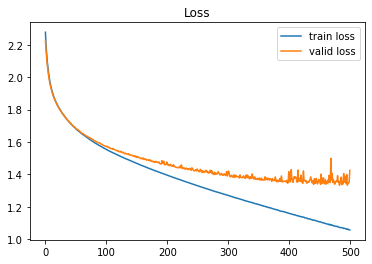

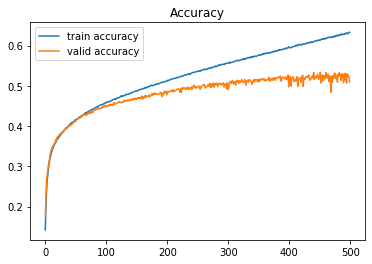

In [8]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()